<a href="https://colab.research.google.com/github/IsaMedina07/SenalesYSistemas_2025_1S/blob/main/Parciales/PARCIAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerías necesarias:
import numpy as np # importar libreria numpy
import sympy as sp
import matplotlib.pyplot as plt #librería para gráficas básicas en python
from scipy.spatial.distance import cdist # Sacar la distancia entre cada muestra y todos los cajones de cuantizacion

# ------- PUNTO 1 -------

In [ ]:
#@title Función de cero y oendiente:
y_min= -3.3 # Valor minimo después de cero y pendiente
y_max= 5 # Valor max despues de cero y pendiente
#A continuacion creare una funacion para cero pendiente
def cero_pen (x, ymin=-10, ymax =10): #Vlores que se pudeden definir por defecto
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [ ]:
#@title

# crear vector tiempo por rango y por número de muestras
# número de muestras
Fo= 1.59
To= 1/Fo
Fs= 10*Fo # tiempo incial referencia [s] asugurando frecuencia de nyquist
Ts=1/Fs
# vector de tiempo equiespacioado
tv = np.arange(0,5*To,Ts) #Multiplicarlo por 2 me sirve para definir el numero de peridos que quiero pintar
y= -20*np.cos(7*tv)-3*np.cos(5*tv)+2*np.cos(10*tv)

#Cero y pendiente
ysp= cero_pen(y, ymin=-3.3, ymax=5)

#numero de bits y vector cuantizacion
nbits= 5
rmin= -3.3
rmax= 5
ve= np.linspace(rmin,rmax,2**nbits) #

#Distancias y cero pendiente a vector a cuatizacion
d= cdist(ve.reshape(-1,1),ysp.reshape(-1,1))  #crea un vectores de columna como lo pide cdist
d.shape #d es una matriz de 500 x 8  la fila 1 incluye la distancia euclide entre  raiz cuadra de el componente rela menos la comppnente imaginaria

(32, 50)

In [ ]:
ind = np.argmin(d,axis=0) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([ 1,  2,  5, 10, 16, 22, 27, 30, 30, 28, 23, 17, 10,  4,  1,  1,  4,
        9, 15, 21, 26, 28, 27, 24, 19, 14,  9,  5,  4,  5,  8, 12, 17, 21,
       25, 27, 27, 25, 21, 16, 10,  5,  1,  0,  2,  6, 13, 20, 26, 31])

In [ ]:
print(ysp.shape,ind.shape,ve.shape)

(50,) (50,) (32,)


In [ ]:
print(ysp[1],ind[1],ve[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

-2.747323148218153 2 -2.7645161290322577


In [ ]:
#Funión de cuantizacion punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ysp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ysp[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ysp[i],ve)) #apilar datos cuantizando si i>0

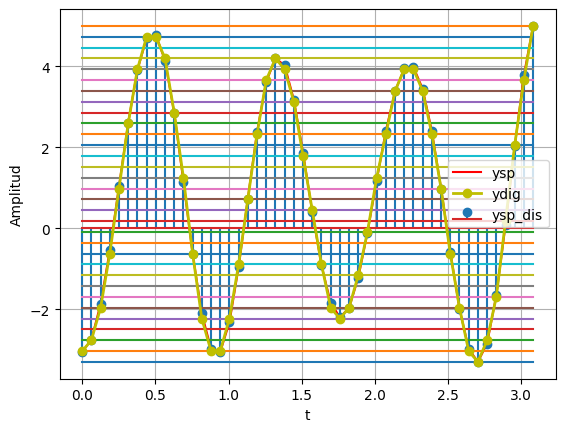

In [ ]:
#graficar señales
import matplotlib.pyplot as plt
plt.plot(tv,ysp,c='r', label='ysp')#cs continua

plt.stem(tv,ysp, label='ysp_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# ------- PUNTO 2 -------

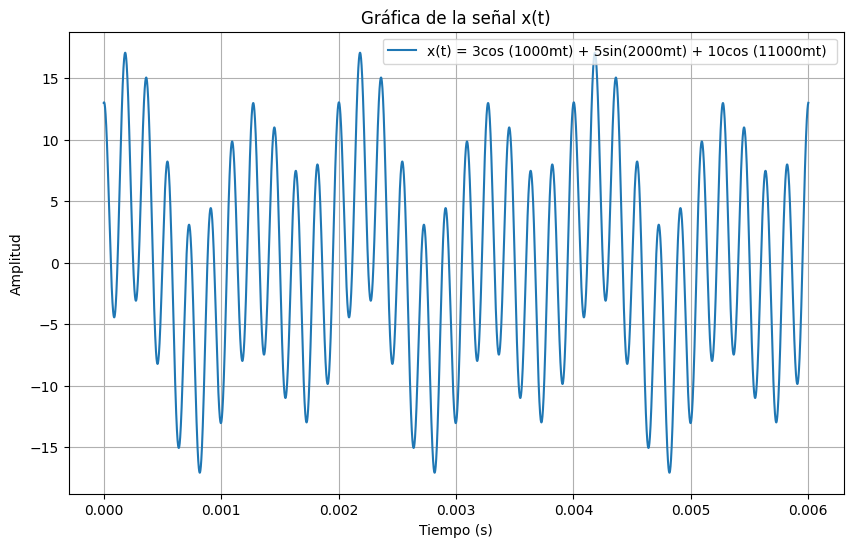

In [ ]:
#@title Graficamos la señal original
t = np. linspace(0, 0.006, 10000)
# Se define t y damos valor al intervalo de tiempo a graficar, la linea de linspace hace que se genere un vector de tiempo de 0 hasta 6 ms con 10000 muestras para obtener una resolucion temporal fina.
# Se define x_t como la señal a trabajar
x_t = 3*np.cos(1000*np.pi*t)+5*np.sin(2000*np.pi*t)+ 10*np.cos(11000*np.pi*t)
# Se grafica la señal x(t)
plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.plot(t, x_t, label='x(t) = 3cos (1000mt) + 5sin(2000mt) + 10cos (11000mt) ')
plt.title('Gráfica de la señal x(t)') # Título de la gráfica
plt.xlabel( 'Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title Creamos la funcion para muestrear y graficar la señal
def muestrar_graficar(Fs, duracion=0.006, titulo= ""):
  """
  Muestra y grafica la señal x_t,utilizando la frecuancia de muestreo  de 5kHz
  Fs= Frecuancia de muestreo en Hz
  duracion= duracion de la señal en segundos
  titulo= titulo de la grafica
  """
  T=1/Fs #Vector de muestreo
  t=np.arange(0,duracion,T) #Vector de tiempo
  #Señal
  x_t=3*np.cos(1000*np.pi*t)+5*np.sin(2000*np.pi*t)+10*np.cos(11000*np.pi*t)

  #Grafica de la señal muestreada
  plt.figure(figsize=(10, 6))
  plt.stem(t, x_t, linefmt='b-', markerfmt='ro', basefmt='k-')
  plt.title(titulo)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()

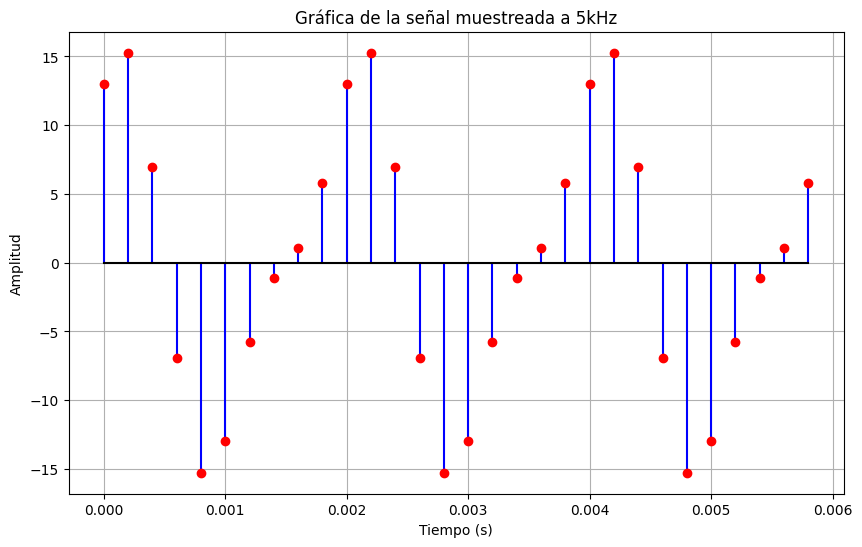

In [ ]:
#@title Grafica de la señal muestreada a 5kHz
muestrar_graficar(5000, titulo="Gráfica de la señal muestreada a 5kHz")

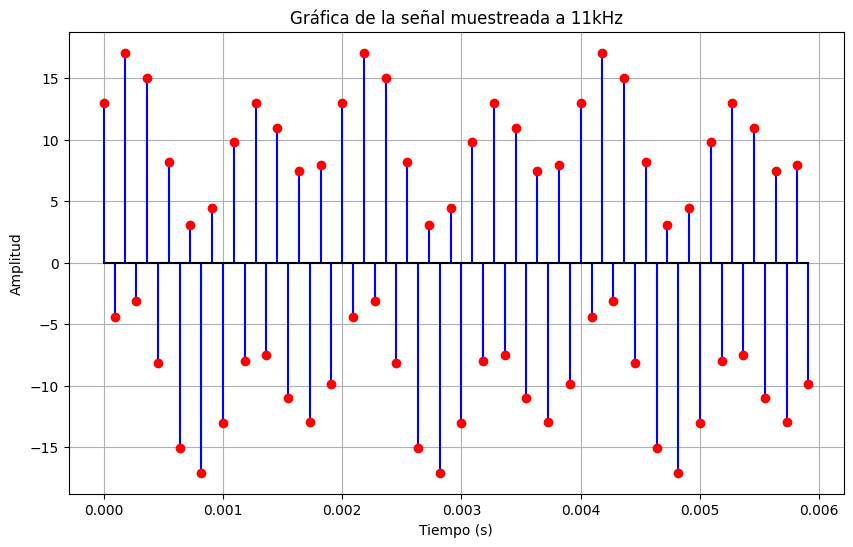

In [ ]:
#@title Grafica de la señal muestreada a una frecuencia adecuada [11kHz]
muestrar_graficar(11000, titulo="Gráfica de la señal muestreada a 11kHz")

# ------- PUNTO 3 -------

In [ ]:
# Definición de variables simbólicas
t, T = sp.symbols('t T', real=True, positive=True)
w0 = 2 * sp.pi / T
A = sp.symbols('A', real=True, positive=True)

# Definición de las señales
x1 = A*sp.cos(w0 * t)
# Definición por partes de x2
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Definición de la función a integrar (diferencia al cuadrado)
f = (x1 - x2)**2

# Cálculo de la integral en cada tramo y suma total
integral = sp.integrate(f, (t, 0, T/4)) + sp.integrate(f, (t, T/4, 3*T/4)) + sp.integrate(f, (t, 3*T/4, T))

# Normalización por el periodo
distancia_media = integral / T

# Simplificación del resultado
distancia_media_simplificada = sp.simplify(distancia_media)

distancia_media_simplificada

A**2/2 - 4*A/pi + 1

# ------- PUNTO 4 -------
Comprobamos la señal

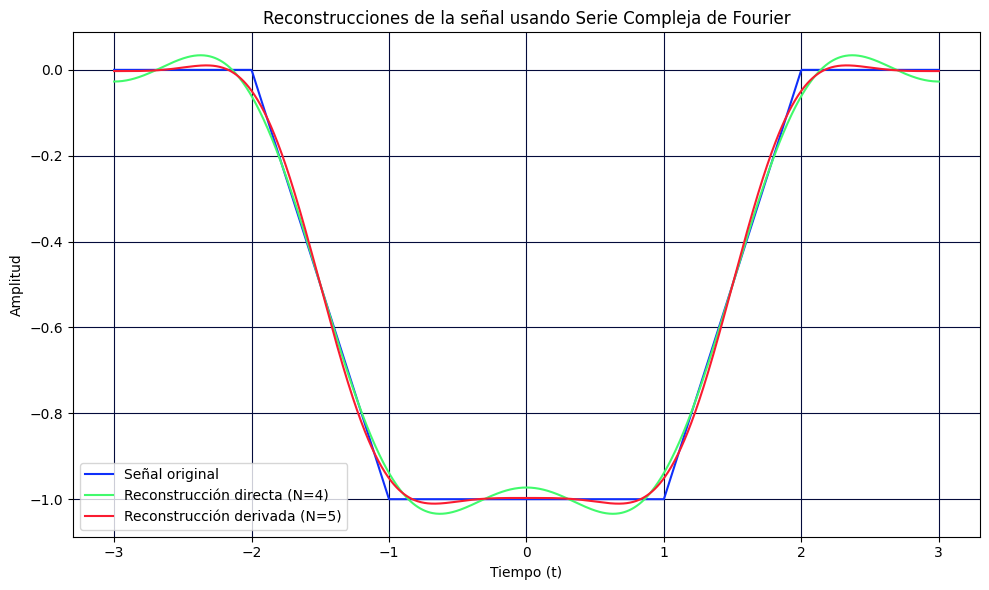

In [ ]:
"""
Reconstrucción de una señal periódica mediante series de Fourier compleja.
Este script:
- Define una señal trapezoidal piecewise.
- Calcula sus coeficientes de Fourier por dos métodos:
   1) Directamente mediante la fórmula integral.
   2) Usando los coeficientes obtenidos a partir de la segunda derivada de la señal.
- Realiza la reconstrucción aproximada de la señal usando un número finito de términos.

"""

import numpy as np
import matplotlib.pyplot as plt

# === Parámetros del sistema ===
d1 = 1    # Inicio de la rampa ascendente (izquierda)
d2 = 2    # Fin de la rampa descendente (derecha)
A = 1     # Altura máxima de la señal
T = 6     # Período total de la señal

# === Dominio temporal ===
t = np.linspace(-T/2, T/2, 1000)  # Vector de tiempo centrado en cero

# === Definición de la señal piecewise trapezoidal ===
m2 = A / (d2 - d1)  # Pendiente de las rampas
m1 = -m2            # Pendiente negativa

x = np.piecewise(t,
                  [
                      ((t >= -T/2) & (t < -d2)),        # Zona izquierda (cero)
                      ((t >= -d2) & (t <= -d1)),        # Rampa ascendente
                      ((t > -d1) & (t <= d1)),          # Plataforma superior
                      ((t > d1) & (t <= d2)),           # Rampa descendente
                      ((t > d2) & (t <= T/2))           # Zona derecha (cero)
                  ],
                  [
                      0,                                # Valor constante
                      lambda t: m1 * t + d2 * m1,       # Ecuación de la rampa ascendente
                      -A,                                # Nivel alto
                      lambda t: m2 * t + d2 * m1,       # Ecuación de la rampa descendente
                      0                                 # Valor constante
                  ])

# Arreglos para almacenar los valores reconstruidos (aceptan números complejos)
re1 = np.zeros(1000, dtype=complex)  # Reconstrucción directa
re2 = np.zeros(1000, dtype=complex)  # Reconstrucción con derivada
re3 = np.zeros(1000, dtype=complex)  # Otra reconstrucción con derivada

# === Función de reconstrucción directa ===
def recos1(ti, N, T):
    """
    Reconstruye la señal usando la serie compleja de Fourier hasta el orden N.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T  # Frecuencia angular fundamental
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn multiplicado por exponencial compleja
            integrando = x * np.exp(-1j * i * omega * t)
            cn = (2 / T) * np.trapezoid(integrando, t)
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0)
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# === Función de reconstrucción usando la segunda derivada ===
def recos2(ti, N, T, d1, d2, A):
    """
    Reconstruye la señal usando coeficientes calculados a partir de la segunda derivada.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal
    d1, d2 (float): Límites de las rampas
    A (float): Altura máxima de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn usando derivada
            numerador = 4 * (A / (d2 - d1)) * (np.cos(d1 * i * omega) - np.cos(d2 * i * omega))
            denominador = T * i**2 * omega**2
            cn = numerador / denominador
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0), igual que antes
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# === Reconstrucción punto a punto ===
for i in range(1000):
    re1[i] = recos1(t[i], 4, T)  # Reconstrucción con 5 términos (0 a 4)
for i in range(1000):
    re2[i] = recos2(t[i], 5, T, d1, d2, -A)  # Reconstrucción con 6 términos (0 a 5)
# for i in range(1000):
#     re3[i] = recos2(t[i], 1, T, d1, d2, -A)  # Reconstrucción con 2 términos (0 a 1)

# === Gráfica de resultados ===
plt.figure(figsize=(10, 6))
plt.plot(t, x, color=(0.0588, 0.1843, 0.9804), label='Señal original')
plt.plot(t, re1.real, color=(0.2549, 0.9804, 0.4235), label='Reconstrucción directa (N=4)')
plt.plot(t, re2.real, color=(0.9804, 0.1059, 0.1882), label='Reconstrucción derivada (N=5)')
#plt.plot(t, re3.real, color=(0,0,0), label='Reconstrucción derivada (N=1)')
plt.title('Reconstrucciones de la señal usando Serie Compleja de Fourier')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(color=(0.0157, 0.0431, 0.2314))
plt.tight_layout()
plt.show()

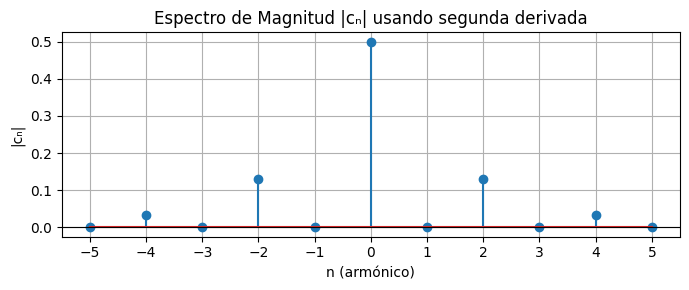

In [ ]:
#@title Cálculo del espectro:

# === Calcular término constante c₀ ===
c0 = (1 / T) * np.trapezoid(x, t)

N_max = 5   # Número máximo de armónicos a graficar
# === Vector de armónicos n ∈ [-N_max, ..., 0, ..., N_max] ===
nv = np.arange(-N_max, N_max + 1)

# === Frecuencia angular fundamental ===
omega0 = (2 * np.pi) / T

# === Calcular coeficientes de Fourier usando segunda derivada ===
Cn = np.zeros_like(nv, dtype=np.complex128)

non_zero_mask = nv != 0  # Evitar división por cero
Cn[non_zero_mask] = (2j / (T * nv[non_zero_mask]**2 * omega0**2)) * \
                    (np.sin(nv[non_zero_mask] * omega0 * d1) - np.sin(nv[non_zero_mask] * omega0 * d2))

# Asignar valor medio en n=0
Cn[nv == 0] = c0

# Gráfica del espectro
plt.figure(figsize=(7, 3))
plt.stem(nv, np.abs(Cn))
plt.title("Espectro de Magnitud |cₙ| usando segunda derivada")
plt.xlabel("n (armónico)")
plt.ylabel("|cₙ|")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(nv)
plt.tight_layout()
plt.show()

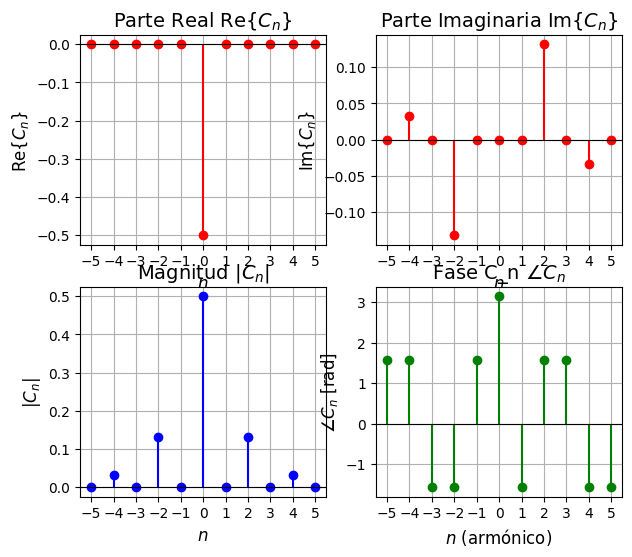

In [ ]:
# @title graficar espectro

# Gráfico del espectro en formato de matriz 2x2
fig = plt.figure(figsize=(7, 6))

# === Fila 1: Parte real e imaginaria ===

# Parte real
ax1 = fig.add_subplot(2, 2, 1)
ax1.stem(nv, np.real(Cn), 'r', basefmt=" ")
ax1.set_title(r'Parte Real $\text{Re}\{C_n\}$', fontsize=14)
ax1.set_xlabel(r'$n$', fontsize=12)
ax1.set_ylabel(r'$\text{Re}\{C_n\}$', fontsize=12)
ax1.grid(True)
ax1.axhline(0, color='black', lw=0.8)
ax1.set_xticks(nv)

# Parte imaginaria
ax2 = fig.add_subplot(2, 2, 2)
ax2.stem(nv, np.imag(Cn), 'r', basefmt=" ")
ax2.set_title(r'Parte Imaginaria $\text{Im}\{C_n\}$', fontsize=14)
ax2.set_xlabel(r'$n$', fontsize=12)
ax2.set_ylabel(r'$\text{Im}\{C_n\}$', fontsize=12)
ax2.grid(True)
ax2.axhline(0, color='black', lw=0.8)
ax2.set_xticks(nv)

# === Fila 2: Magnitud ===

# Magnitud
ax3 = fig.add_subplot(2, 2, 3)
ax3.stem(nv, np.abs(Cn), 'b', basefmt=" ")
ax3.set_title(r'Magnitud $|C_n|$', fontsize=14)
ax3.set_xlabel(r'$n$', fontsize=12)
ax3.set_ylabel(r'$|C_n|$', fontsize=12)
ax3.grid(True)
ax3.axhline(0, color='black', lw=0.8)
ax3.set_xticks(nv)

# Fase
ax = fig.add_subplot(2, 2, 4)
ax.stem(nv, np.angle(Cn), 'g', basefmt=" ")
ax.set_title(r'Fase C_n $\angle C_n$', fontsize=14)
ax.set_xlabel(r'$n$ (armónico)', fontsize=12)
ax.set_ylabel(r'$\angle C_n$ [rad]', fontsize=12)
ax.grid(True)
ax.axhline(0, color='black', lw=0.8)
ax.set_xticks(nv)

# # Ajustar espaciado entre subplots
# fig.tight_layout()
# plt.show()